# Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data=pd.read_csv("/content/Titanic_train.csv")

## EDA

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_1=data.drop(["Name","Sex","Ticket","Embarked","Cabin"],axis=1) #removing the categorical columns to check for correlation

In [6]:
data_1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Visualizations

Visualizations makes the data to understand better.We know that pictorial information makes the data understand better

# Heatmap

<Axes: >

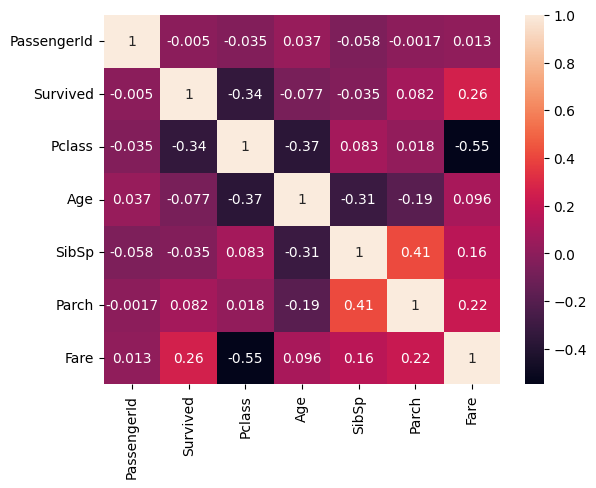

In [7]:
sns.heatmap(data_1.corr(),annot=True)

<Axes: xlabel='Survived'>

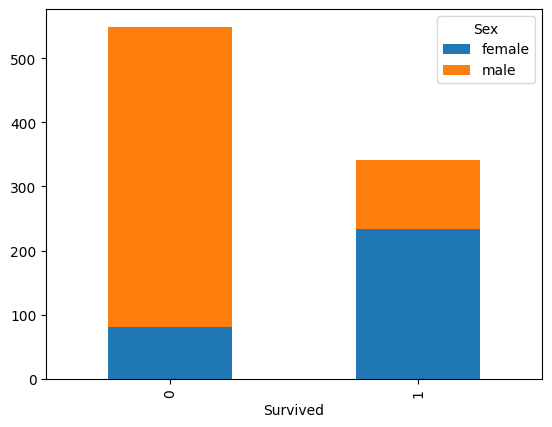

In [8]:
pd.crosstab(data["Survived"],data["Sex"]).plot(kind="bar",stacked=True)

From the above plot, we can understand Most of the survived people are female

<Axes: xlabel='Survived'>

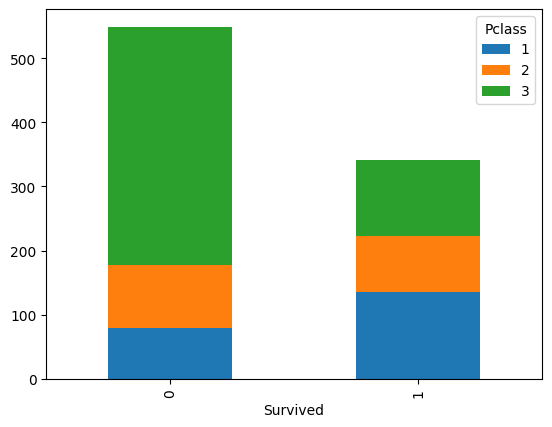

In [9]:
pd.crosstab(data["Survived"],data["Pclass"]).plot(kind="bar",stacked=True)

# Most of the unsurvived people are from third class.

<Axes: xlabel='Survived'>

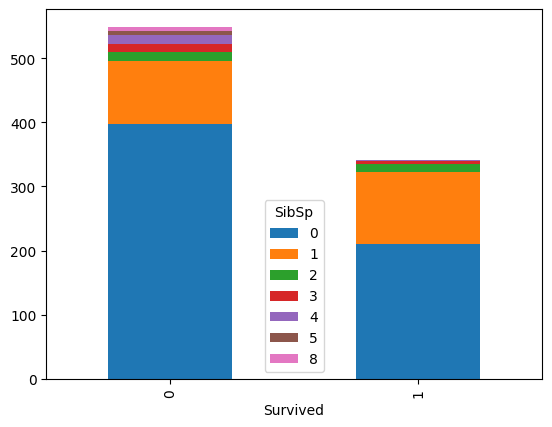

In [10]:
pd.crosstab(data["Survived"],data["SibSp"]).plot(kind="bar",stacked=True)

<Axes: xlabel='Survived'>

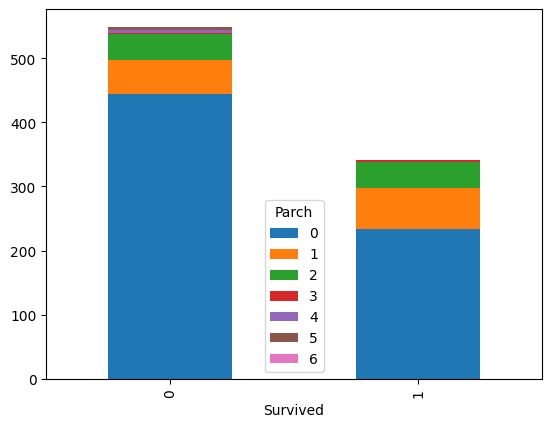

In [11]:
pd.crosstab(data["Survived"],data["Parch"]).plot(kind="bar",stacked=True)

<Axes: xlabel='Survived'>

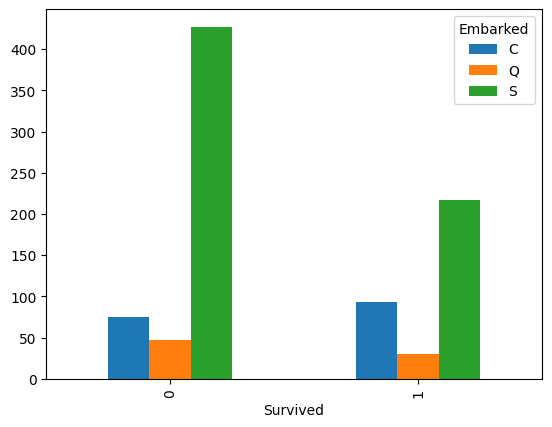

In [12]:
pd.crosstab(data["Survived"],data["Embarked"]).plot(kind="bar")

<Axes: ylabel='count'>

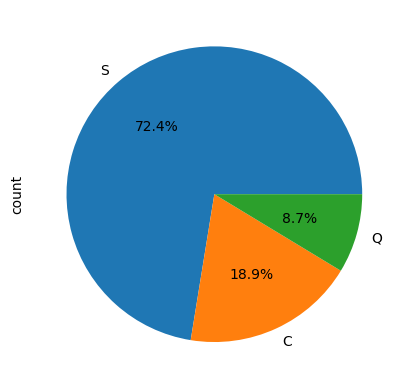

In [13]:
data["Embarked"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

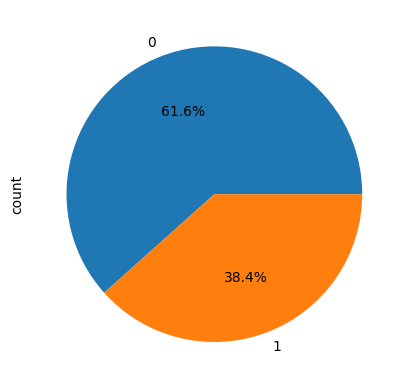

In [14]:
data["Survived"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

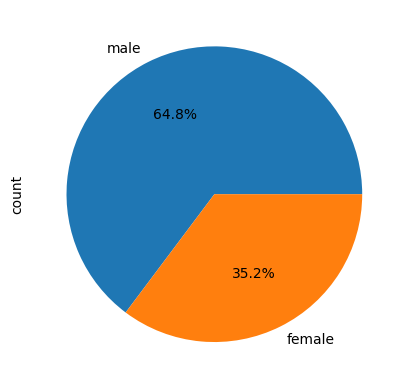

In [15]:
data["Sex"].value_counts().plot(kind="pie",autopct="%1.1f%%")

# Males are more than females in the Titanic ship

<Axes: xlabel='Age', ylabel='Count'>

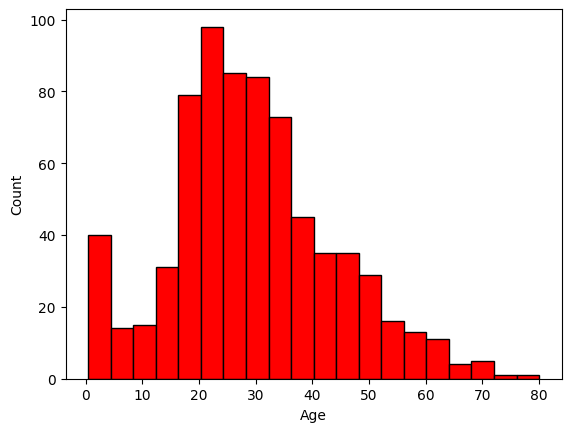

In [16]:
sns.histplot(data["Age"],facecolor="red")

<Axes: xlabel='Survived', ylabel='Age'>

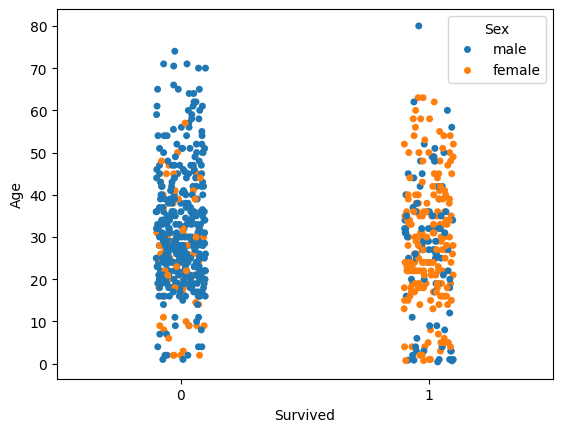

In [17]:
sns.stripplot(x="Survived",y="Age",hue="Sex",data=data)

<Axes: xlabel='Survived', ylabel='Age'>

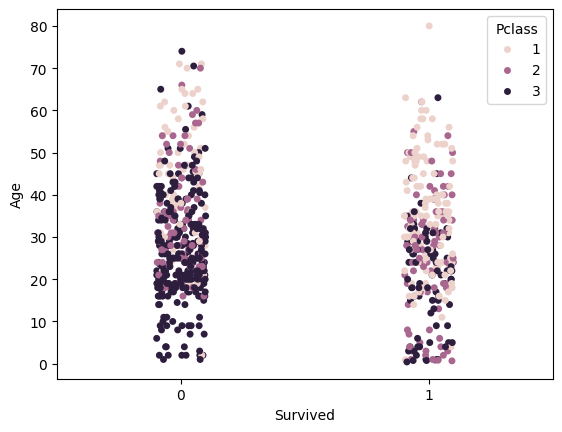

In [18]:
sns.stripplot(x="Survived",y="Age",hue="Pclass",data=data)

<Axes: xlabel='Survived', ylabel='PassengerId'>

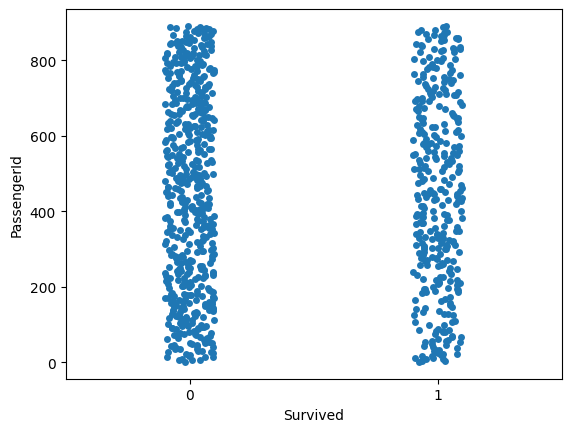

In [19]:
sns.stripplot(x="Survived",y="PassengerId",data=data)

<Axes: xlabel='Survived', ylabel='Fare'>

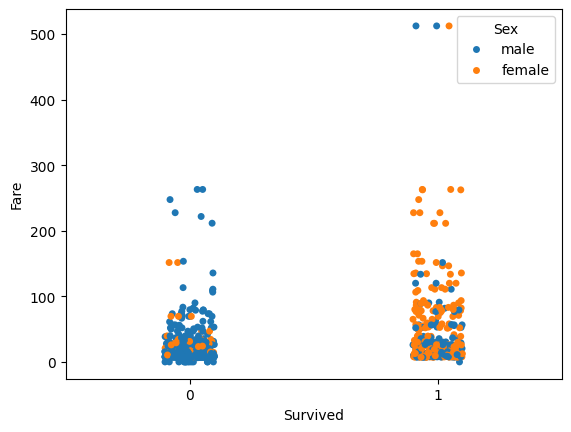

In [20]:
sns.stripplot(x="Survived",y="Fare",hue="Sex",data=data)

In [21]:
data["Cabin"].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


From the above plots,some columns are not making any value to predict the survival.we are removing those columns to get the better model.

In [22]:
data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

## Double-click (or enter) to edit

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Checking for Null values

Checking for null (or missing) values in a dataset is a crucial step in data preprocessing. Missing values can lead to inaccurate model predictions and analyses.

In [24]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


<Axes: xlabel='Age', ylabel='Count'>

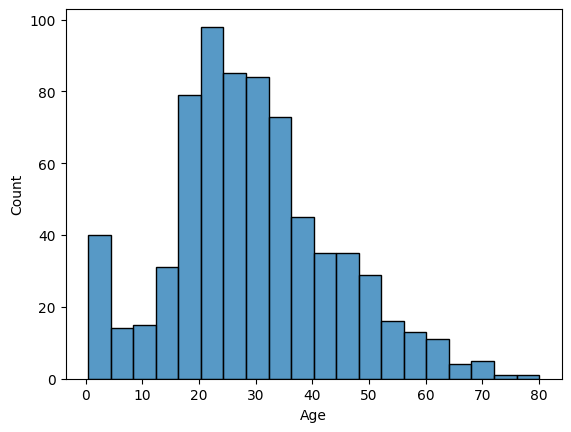

In [25]:
sns.histplot(data["Age"])

In [26]:
data["Age"]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [27]:
data["Age"].mean()

29.69911764705882

In [28]:
data["Age"].median()

28.0

Imputing the null values with median.All of the age values are natural numbers.So instead of filling with mean value,we are filling with median value.

In [29]:
data["Age"].fillna(data["Age"].median(),inplace=True)

In [30]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)  #filling embarked null values with most frequent value

In [31]:
data.isnull().sum().sum()  #All Null values are imputed

0

In [32]:
data[data.duplicated(keep=False)]  #checking for duplicate values

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
4,0,3,male,35.0,0,0,8.0500,S
23,1,1,male,28.0,0,0,35.5000,S
26,0,3,male,28.0,0,0,7.2250,C
28,1,3,female,28.0,0,0,7.8792,Q
29,0,3,male,28.0,0,0,7.8958,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,28.0,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [33]:
data.drop_duplicates(keep="first",inplace=True) #removing the duplicate values

In [34]:
data.reset_index(drop=True,inplace=True)

In [35]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Detecting and Treating of Anamolies

Detecting and treating anomalies (or outliers) in datasets is an essential part of the data preprocessing phase in machine learning. Anomalies can skew the results of your analysis, affect model performance, and lead to incorrect predictions.

{'whiskers': [<matplotlib.lines.Line2D at 0x7df4d9464250>,
 'caps': [<matplotlib.lines.Line2D at 0x7df4d9465e70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df4d94643a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7df4d9465e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df4d9466200>],
 'means': []}

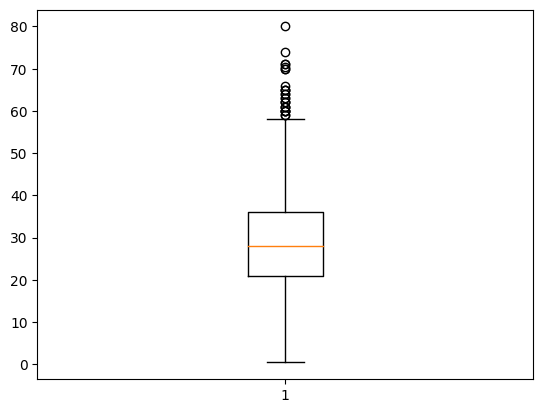

In [36]:
plt.boxplot(data["Age"])

In [37]:
np.percentile(data.Age,[99])

array([65.26])

In [41]:
a=np.percentile(data.Age,[99])[0]
a


65.25999999999999

In [42]:
data.Age[(data.Age>2*a)]=2*a

{'whiskers': [<matplotlib.lines.Line2D at 0x7df4d3d429e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7df4d3d42f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7df4d3d42740>],
 'medians': [<matplotlib.lines.Line2D at 0x7df4d3d43460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7df4d3d43700>],
 'means': []}

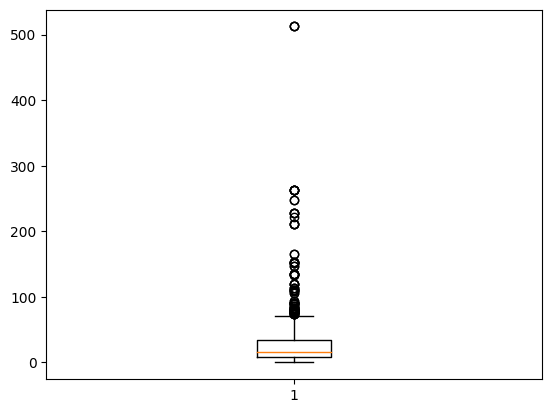

In [43]:
plt.boxplot(data["Fare"])

In [44]:
a=np.percentile(data.Fare,[99])[0]
a

262.375

In [45]:
data.Fare[(data.Fare>2*a)]=2*a

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 48.6+ KB


# Label Encoding

Label encoding is a method to convert categorical data (strings or labels) into numerical format. Many machine learning algorithms require all input features to be numeric, so converting categorical variables into numeric ones is essential. Label encoding assigns a unique integer value to each category.

In [47]:
data["Sex"]=LabelEncoder().fit_transform(data["Sex"])

In [48]:
data["Embarked"]=LabelEncoder().fit_transform(data["Embarked"])

# Standardization

Standardization (also known as Z-score normalization) is a technique used to rescale the features of a dataset so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1. This ensures that all features are on the same scale, which is crucial for many machine learning algorithms like logistic regression, support vector machines (SVM), and K-nearest neighbors (KNN).

In [49]:
scale=StandardScaler()
data["Age"]=scale.fit_transform(data[["Age"]])
data["Fare"]=scale.fit_transform(data[["Fare"]])

In [50]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.551060,1,0,-0.527515,2
1,1,1,0,0.611945,1,0,0.695086,0
2,1,3,0,-0.260308,0,0,-0.514627,2
3,1,1,0,0.393881,1,0,0.347909,2
4,0,3,1,0.393881,0,0,-0.512240,2
...,...,...,...,...,...,...,...,...
770,0,3,0,0.684632,0,5,-0.109851,1
771,1,1,0,-0.769123,0,0,-0.093144,2
772,0,3,0,-0.114933,1,2,-0.218205,2
773,1,1,1,-0.260308,0,0,-0.093144,0


# Splitting the data into Train and test set

To split a dataset into training and test sets, you can use the train_test_split function from sklearn.model_selection. This function helps you split the data into two portions: one for training the model and one for testing its performance on unseen data.

In [51]:
y=data.iloc[:,0]
x=data.iloc[:,1:]

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=36)

In [53]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((542, 7), (233, 7), (542,), (233,))

## Applying the Logistic Regression Model

In [54]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred=model.predict(x_test)

# Working with Test-data

When working with test data in a machine learning project, especially in the context of logistic regression, it's essential to follow a structured approach to ensure the model's performance is evaluated fairly and the test data is treated correctly.

In [56]:
test_data=pd.read_csv("/content/Titanic_test.csv")

In [57]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
test_data.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

In [59]:
test_data["Sex"]=LabelEncoder().fit_transform(test_data["Sex"])

In [60]:
test_data["Embarked"]=LabelEncoder().fit_transform(test_data["Embarked"])

In [61]:
test_data.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [62]:
test_data["Age"].fillna(test_data["Age"].median(),inplace=True)

In [63]:
test_data["Fare"].fillna(test_data["Fare"].mean(),inplace=True)

In [64]:
test_data.drop_duplicates(keep="first",inplace=True)

# Predicting the Test data

In [65]:
model.predict(test_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

## Evaluating the model

Evaluating the performance of a logistic regression model is essential to ensure its accuracy and reliability, especially for binary classification problems. Below are several key metrics used to evaluate a logistic regression model, along with code snippets and explanations for each.

In [66]:
accuracy_score(y_test,y_pred)    #with train-test data

0.8283261802575107

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       124
           1       0.85      0.77      0.81       109

    accuracy                           0.83       233
   macro avg       0.83      0.82      0.83       233
weighted avg       0.83      0.83      0.83       233



[link text](https:// [link text](https://))Accuracy score we got was 83 which is better to predict the data.

# Interpreting the Coefficients


Interpreting the coefficients of a logistic regression model is crucial for understanding the impact of each feature on the predicted outcome. Since logistic regression predicts the probability of a binary outcome, the coefficients represent the log-odds of the outcome.

In [68]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [70]:
model.coef_


array([[-0.94802575, -2.16211791, -0.53575887, -0.32981308, -0.09837717,
         0.18784171, -0.05671915]])

### The columns Pclass,sex and age are the most important features and these three are making more contribution to find the survival probability.

## ROC Curve

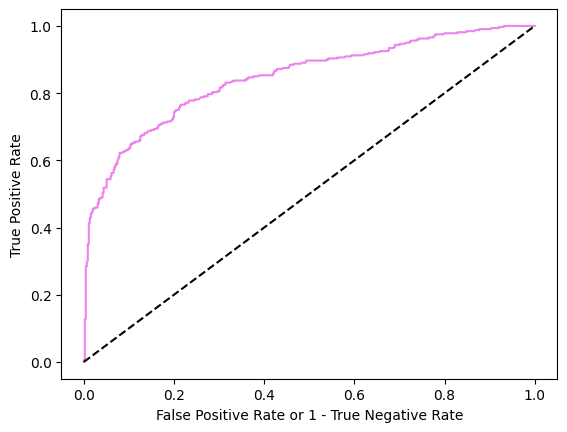

In [71]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y,model.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color="violet")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate or 1 - True Negative Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [76]:
# Interpretation
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.94802575 -2.16211791 -0.53575887 -0.32981308 -0.09837717  0.18784171
 -0.05671915]
Intercept: 3.2508032003683724


In [77]:
import statsmodels.api as sm

# Add a constant to the feature matrix for the intercept term
X_train_with_intercept = sm.add_constant(x_train)

# Fit the model using statsmodels
logit_model = sm.Logit(y_train, X_train_with_intercept)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.485607
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  542
Model:                          Logit   Df Residuals:                      534
Method:                           MLE   Df Model:                            7
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                  0.2735
Time:                        13:28:11   Log-Likelihood:                -263.20
converged:                       True   LL-Null:                       -362.29
Covariance Type:            nonrobust   LLR p-value:                 2.783e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4307      0.489      7.019      0.000       2.473       4.389
Pclass        -0.9947      0.

In [78]:
# Save the Streamlit app to a Python file
streamlit_code = """
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
titanic_train = pd.read_csv(r"E:\\hyderabad\\Data Science\\excler's\\Assinments\\Logistic Regression\\Titanic_train.csv")

# Preprocess the data (same as in the notebook)
titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

# Initialize LabelEncoders
label_encoder_sex = LabelEncoder()
titanic_train["Sex"] = label_encoder_sex.fit_transform(titanic_train["Sex"])

label_encoder_embarked = LabelEncoder()
titanic_train["Embarked"] = label_encoder_embarked.fit_transform(titanic_train["Embarked"])

# Prepare input data for prediction
X = titanic_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = titanic_train["Survived"]

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Streamlit app
st.title('Titanic Survival Prediction App')
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['Male', 'Female'])
age = st.slider('Age', 1, 100)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8)
parch = st.slider('Number of Parents/Children Aboard', 0, 6)
fare = st.slider('Fare Paid', 0, 500)
embarked = st.selectbox('Port of Embarkation', ['S', 'C', 'Q'])

# Convert input to the encoded format for the model
input_data = [
    pclass,
    label_encoder_sex.transform([sex.lower()])[0],
    age,
    sibsp,
    parch,
    fare,
    label_encoder_embarked.transform([embarked])[0]
]

if st.button('Predict Survival'):
    prediction = model.predict([input_data])[0]
    probability = model.predict_proba([input_data])[0][1]
    st.write(f"Prediction: {'Survived' if prediction == 1 else 'Did Not Survive'}")
    st.write(f"Probability of Survival: {probability:.2f}")
"""


Deployment with Streamlit
import streamlit as st

import pickle

import numpy as np

Defining the Streamlit app

st.title('Titanic Survival Prediction')

st.write('This app predicts the probability of surviving the Titanic disaster.')

User input features

pclass = st.selectbox('Passenger Class', [1, 2, 3])

sex = st.selectbox('Sex', ['male', 'female'])

age = st.slider('Age', 0, 80, 30)

sibsp = st.number_input('Number of Siblings/Spouses Aboard', 0, 8, 0)

parch = st.number_input('Number of Parents/Children Aboard', 0, 6, 0)

fare = st.slider('Fare', 0.0, 500.0, 32.0)

embarked = st.selectbox('Port of Embarkation', ['Cherbourg', 'Queenstown', 'Southampton'])

Encode categorical inputs

sex = 1 if sex == 'male' else 0

embarked_dict = {'Cherbourg': 0, 'Queenstown': 1, 'Southampton': 2}

embarked = embarked_dict[embarked]

Prediction features = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])

prediction = model.predict(features)[0]

probability = model.predict_proba(features)[0][1]

Output prediction

if prediction == 1:

st.write(f'The model predicts that the passenger survived with a probability of {probability:.2f}.')
else:

st.write(f'The model predicts that the passenger did not survive with a probability of {1 - probability:.2f}.')

**1. What is the difference between precision and recall?**                       
Precision and recall are two important metrics used to evaluate the performance of classification models, particularly in the context of binary classification.                                                            
**Precision**:                                                          
**Definition:** Precision is the ratio of true positive predictions to the total positive predictions made by the model.                             
**Recall (also known as Sensitivity or True Positive Rate):**                                   
**Definition:** Recall is the ratio of true positive predictions to the actual positive instances in the dataset.


**2. What is cross-validation, and why is it important in binary classification?**                         
 Cross-Validation: A technique where the dataset is split into k folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times.

Importance:

Prevents overfitting by testing on different subsets. Provides better model evaluation across various data splits. Helps in hyperparameter tuning by offering reliable performance estimates.